In [1]:
#import dependancies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

In [2]:
#read in data
data = pd.read_csv('/Users/kscomputer/Desktop/Project_1/Project_1/output_data/oxford_clean3.csv')
data.head()

,CountryName,Date,C1_School_closing,C2_Workplace_closing,C6_Stay_home_requirements,E1_Income_support,E3_Fiscal_measures,H6_Facial_coverings,ConfirmedCases,ConfirmedDeaths
0,Brazil,20200101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Brazil,20200102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Brazil,20200103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Brazil,20200104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Brazil,20200105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')

In [4]:
#narrow down data to just mandataes
info = pd.DataFrame(data, columns= ["CountryName", "Date", "C1_School_closing", "C2_Workplace_closing",
                                         "C6_Stay_home_requirements", "E1_Income_support",
                                    "H6_Facial_coverings"])

In [5]:
info.head()

,CountryName,Date,C1_School_closing,C2_Workplace_closing,C6_Stay_home_requirements,E1_Income_support,H6_Facial_coverings
0,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0
1,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0
2,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0
3,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0
4,Brazil,2020-01-05,0.0,0.0,0.0,0.0,0.0


In [6]:
info = info.astype({'C1_School_closing': 'int', 'C2_Workplace_closing': 'int', 
                    'C6_Stay_home_requirements': 'int', 'E1_Income_support':'int',
                            'H6_Facial_coverings': 'int'}) 

In [7]:
info['Date'] = pd.to_datetime(info['Date'], format='%Y%m%d')
info.dropna()

,CountryName,Date,C1_School_closing,C2_Workplace_closing,C6_Stay_home_requirements,E1_Income_support,H6_Facial_coverings
0,Brazil,2020-01-01,0,0,0,0,0
1,Brazil,2020-01-02,0,0,0,0,0
2,Brazil,2020-01-03,0,0,0,0,0
3,Brazil,2020-01-04,0,0,0,0,0
4,Brazil,2020-01-05,0,0,0,0,0
...,...,...,...,...,...,...,...
2405,United States,2020-10-21,3,2,2,2,4
2406,United States,2020-10-22,3,2,2,2,4
2407,United States,2020-10-23,3,2,2,2,4
2408,United States,2020-10-24,3,2,2,2,4


In [8]:
#The values below are from "worldometers.info"
# Total populations as of Jan 1, 2020.
braz_pop = 212559417
china_pop = 1408526449
ital_pop = 60005743
jp_pop = 125938348
nz_pop = 4822233
swe_pop = 10151866
uk_pop = 66575226
us_pop = 330380000

# Create a list containing the total populations of each conutry
pops = (212559417, 1408526449, 60005743, 125938348, 4822233, 10151866, 66575226, 330380000)

# Locate the most recent date data is available for all countries
last_df=data.loc[data['Date']=='2020-10-22']

 
#Add a column to e new DF containing total populations for analysis purposes
last_df["total_pop"] = pops
last_df = last_df.set_index('CountryName')
last_df

# # Calculate the Percentage of Each Country Infected and Deceased
perc_cases = (last_df['ConfirmedCases']/last_df["total_pop"])
perc_deaths = (last_df['ConfirmedDeaths']/last_df["total_pop"])

# # Create a DataFrame to hold these values
perc_summ = pd.DataFrame({'Percent_Infected':perc_cases, 'Percent_Deceased':perc_deaths})
perc_summ.style.format({"Percent_Infected":"{:.6%}", "Percent_Deceased":"{:.6%}"})

perc_summ


/Users/kscomputer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Percent_Infected,Percent_Deceased
CountryName,,
Brazil,0.024928,0.000731
China,0.000065,0.000003
United Kingdom,0.013153,0.000736
Italy,0.003570,0.000292
Japan,0.019602,0.000349
New Zealand,0.000153,0.000002
Sweden,0.001642,0.000089
United States,0.025232,0.000673


In [9]:
#transpose the .describe  so I can run mean on 50% column to find what countries issued relaxed mandates and which had strict mandates
info.describe().T

,count,mean,std,min,25%,50%,75%,max
C1_School_closing,2410.0,1.697095,1.305365,0.0,0.0,2.0,3.0,3.0
C2_Workplace_closing,2410.0,1.480083,1.184784,0.0,0.0,2.0,3.0,3.0
C6_Stay_home_requirements,2410.0,0.966805,1.034351,0.0,0.0,1.0,2.0,3.0
E1_Income_support,2410.0,1.091701,0.803876,0.0,0.0,1.0,2.0,2.0
H6_Facial_coverings,2410.0,1.462241,1.609832,0.0,0.0,1.0,3.0,4.0


In [10]:
#everything below 1.4 is relaxed mandate country. everything above is strict country
info_mean = info.describe().T['50%'].mean()
info_mean

1.4

In [11]:
#brazil country by itself with total mean labeled as brazil total and insight summary df for looking to see if there is any further insights to explore
brazil = info.loc[info['CountryName']=='Brazil']
brazil_mean = brazil.mean()
brazil_mean
brazil_sum = brazil_mean.sum()
brazil_sum
brazil_total = (brazil_sum/5)

In [12]:
#china country by itself with total mean labeled as china total and insight summary df for looking to see if there is any further insights to explore
china = info.loc[info['CountryName']=='China']
china_mean = china.mean()
china_mean
china_sum = china_mean.sum()
china_sum
china_total = (china_sum/5)


In [13]:
#uk country by itself with total mean labeled as uk total and insight summary df for looking to see if there is any further insights to explore
uk = info.loc[info['CountryName']=='United Kingdom']
uk_mean = uk.mean()
uk_mean
uk_sum = uk_mean.sum()
uk_sum
uk_total = (uk_sum/5)


In [14]:
#itlay country by itself with total mean labeled as italy total and insight summary df for looking to see if there is any further insights to explore
italy = info.loc[info['CountryName']=='Italy']
italy_mean = italy.mean()
italy_mean
italy_sum = italy_mean.sum()
italy_sum
italy_total = (italy_sum/5)


In [15]:
#japan country by itself with total mean labeled as japan total and insight summary df for looking to see if there is any further insights to explore
japan = info.loc[info['CountryName']=='Japan']
japan_mean = japan.mean()
japan_mean
japan_sum = japan_mean.sum()
japan_sum
japan_total = (japan_sum/5)

In [16]:
#New Zealand country by itself with total mean labeled as New Zealand total and insight summary df for looking to see if there is any further insights to explore
nz = info.loc[info['CountryName']=='New Zealand']
nz_mean = nz.mean()
nz_mean
nz_sum = nz_mean.sum()
nz_sum
nz_total = (nz_sum/5)


In [17]:
#sweden country by itself with total mean labeled as sweden total and insight summary df for looking to see if there is any further insights to explore
meatball = info.loc[info['CountryName']=='Sweden']

meatball_mean = meatball.mean()
meatball_mean
meatball_sum = meatball_mean.sum()
meatball_sum
meatball_total = (meatball_sum/5)


In [18]:
#united states country by itself with total mean labeled as united states total and insight summary df for looking to see if there is any further insights to explore
us = info.loc[info['CountryName']=='United States']
us

us_mean = us.mean()
us_mean
us_sum = us_mean.sum()
us_sum
us_total = (us_sum/5)


In [19]:
#summary df with country and average mandate
total = {'Country':['China','Brazil','United States','Italy','United Kingdom'
                   ,'Japan','New Zealand','Sweden'],
         'Average Mandate':[china_total, brazil_total, us_total, italy_total,
                           uk_total,japan_total, nz_total, meatball_total]}


sum_df = pd.DataFrame(total)

sum_df

,Country,Average Mandate
0,China,1.995380
1,Brazil,1.860927
2,United States,1.820805
3,Italy,1.645946
4,United Kingdom,1.298693
5,Japan,0.792834
6,New Zealand,0.769024
7,Sweden,0.540864


In [20]:
#1.4 was the mean of the 50% column above on .describe(), making the df below the Strict countries
strict_df = sum_df.loc[sum_df['Average Mandate']>=1.4]
strict_df

,Country,Average Mandate
0,China,1.995380
1,Brazil,1.860927
2,United States,1.820805
3,Italy,1.645946


In [21]:
##1.4 was the mean of the 50% column above on .describe(), making the df below the relax countries
lax_df = sum_df.loc[sum_df['Average Mandate']<=1.4]
lax_df

,Country,Average Mandate
4,United Kingdom,1.298693
5,Japan,0.792834
6,New Zealand,0.769024
7,Sweden,0.540864


In [22]:
#brazil max number of cases
brazil= data.loc[data['CountryName']=='Brazil']
brazil_max = brazil['ConfirmedCases'].max()
brazil_max

5439641.0

In [23]:
#china max number of cases
china= data.loc[data['CountryName']=='China']
china_max = china['ConfirmedCases'].max()
china_max

91241.0

In [24]:
#us max number of cases
us= data.loc[data['CountryName']=='United States']
us_max = us['ConfirmedCases'].max()
us_max

8576725.0

In [25]:
#italy max number of cases
italy= data.loc[data['CountryName']=='Italy']
italy_max = italy['ConfirmedCases'].max()
italy_max

449648.0

In [26]:
#uk max number of cases
uk= data.loc[data['CountryName']=='United Kingdom']
uk_max = uk['ConfirmedCases'].max()
uk_max

1034914.0

In [27]:
#japan max number of cases
japan= data.loc[data['CountryName']=='Japan']
japan_max = japan['ConfirmedCases'].max()
japan_max

101813.0

In [28]:
#new zealand max number of cases
nz= data.loc[data['CountryName']=='New Zealand']
nz_max = nz['ConfirmedCases'].max()
nz_max

1603.0

In [29]:
#sweden max number of cases
meatball= data.loc[data['CountryName']=='Sweden']
meatball_max = meatball['ConfirmedCases'].max()
meatball_max

115927.0

In [30]:
#summary df of country and total cases
totals = {'Country':['China','Brazil','United States','Italy','United Kingdom'
                   ,'Japan','New Zealand','Sweden'],
         'Confirmed Cases':[china_max, brazil_max, us_max, italy_max,
                           uk_max,japan_max, nz_max, meatball_max]}


totals_df = pd.DataFrame(totals)

totals_df

,Country,Confirmed Cases
0,China,91241.0
1,Brazil,5439641.0
2,United States,8576725.0
3,Italy,449648.0
4,United Kingdom,1034914.0
5,Japan,101813.0
6,New Zealand,1603.0
7,Sweden,115927.0


In [31]:
#summary df with strict mandate country total confirmed cases
strict_max = totals_df.loc[totals_df['Country'].isin(['China','Brazil','United States','Italy'])]
strict_max

,Country,Confirmed Cases
0,China,91241.0
1,Brazil,5439641.0
2,United States,8576725.0
3,Italy,449648.0


In [32]:
#summary df with relaxed mandate country total confirmed cases
lax_max = totals_df.loc[totals_df['Country'].isin(['United Kingdom','Japan','New Zealand','Sweden'])]
lax_max

,Country,Confirmed Cases
4,United Kingdom,1034914.0
5,Japan,101813.0
6,New Zealand,1603.0
7,Sweden,115927.0


In [33]:
#brazil max number of deaths
brazil= data.loc[data['CountryName']=='Brazil']
brazil_d = brazil['ConfirmedDeaths'].max()
brazil_d

157946.0

In [34]:
#china max number of deaths
china= data.loc[data['CountryName']=='China']
china_d = china['ConfirmedDeaths'].max()
china_d

4739.0

In [35]:
#US max number of deaths
us= data.loc[data['CountryName']=='United States']
us_d = us['ConfirmedDeaths'].max()
us_d

224899.0

In [36]:
#italy max number of deaths
italy= data.loc[data['CountryName']=='Italy']
italy_d = italy['ConfirmedDeaths'].max()
italy_d

36832.0

In [37]:
#uk max number of deaths
uk= data.loc[data['CountryName']=='United Kingdom']
uk_d = uk['ConfirmedDeaths'].max()
uk_d

46717.0

In [38]:
#japan max number of deaths
japan= data.loc[data['CountryName']=='Japan']
japan_d = japan['ConfirmedDeaths'].max()
japan_d

1774.0

In [39]:
#new zealnd max number of deaths
nz= data.loc[data['CountryName']=='New Zealand']
nz_d = nz['ConfirmedDeaths'].max()
nz_d

25.0

In [40]:
#sweden max number of deaths
meatball= data.loc[data['CountryName']=='Sweden']
meatball_d = meatball['ConfirmedDeaths'].max()
meatball_d

5936.0

In [41]:
#summary df of country and total deaths
total_d = {'Country':['China','Brazil','United States','Italy','United Kingdom'
                   ,'Japan','New Zealand','Sweden'],
         'Confirmed Deaths':[china_d, brazil_d, us_d, italy_d,
                           uk_d,japan_d, nz_d, meatball_d]}


death_df = pd.DataFrame(total_d)
death_df

,Country,Confirmed Deaths
0,China,4739.0
1,Brazil,157946.0
2,United States,224899.0
3,Italy,36832.0
4,United Kingdom,46717.0
5,Japan,1774.0
6,New Zealand,25.0
7,Sweden,5936.0


In [42]:
#summary df with strict mandate country total confirmed deaths
strict_d = death_df.loc[death_df['Country'].isin(['China','Brazil','United States','Italy'])]
strict_d

,Country,Confirmed Deaths
0,China,4739.0
1,Brazil,157946.0
2,United States,224899.0
3,Italy,36832.0


In [43]:
#summary df with relaxed mandate country total confirmed deaths
lax_d = death_df.loc[death_df['Country'].isin(['United Kingdom','Japan','New Zealand','Sweden'])]
lax_d

,Country,Confirmed Deaths
4,United Kingdom,46717.0
5,Japan,1774.0
6,New Zealand,25.0
7,Sweden,5936.0


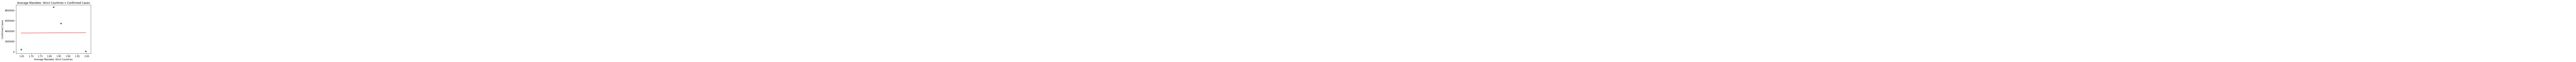

In [44]:
#linear regression strict mandates v strict cases
x_values = strict_df['Average Mandate']
y_values = strict_max['Confirmed Cases']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Strict Countries v Confirmed Cases')
plt.xlabel('Average Mandate: Strict Countries')
plt.ylabel('Confirmed Cases')
plt.show()

In [45]:
#pearsonr for strict mandates v strict cases
correlation = st.pearsonr(strict_df['Average Mandate'], strict_max['Confirmed Cases'])
correlation

(0.005969848828868585, 0.9940301511711314)

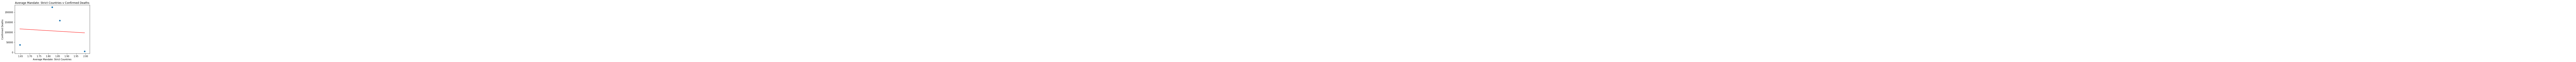

In [46]:
#linear regression strict mandates v strict deaths
x_values = strict_df['Average Mandate']
y_values = strict_d['Confirmed Deaths']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Strict Countries v Confirmed Deaths')
plt.xlabel('Average Mandate: Strict Countries')
plt.ylabel('Confirmed Deaths')
plt.show()

In [47]:
#pearsonr for strict mandates v strict deaths
correlation = st.pearsonr(strict_df['Average Mandate'], strict_d['Confirmed Deaths'])
correlation

(-0.07862970050620083, 0.9213702994937991)

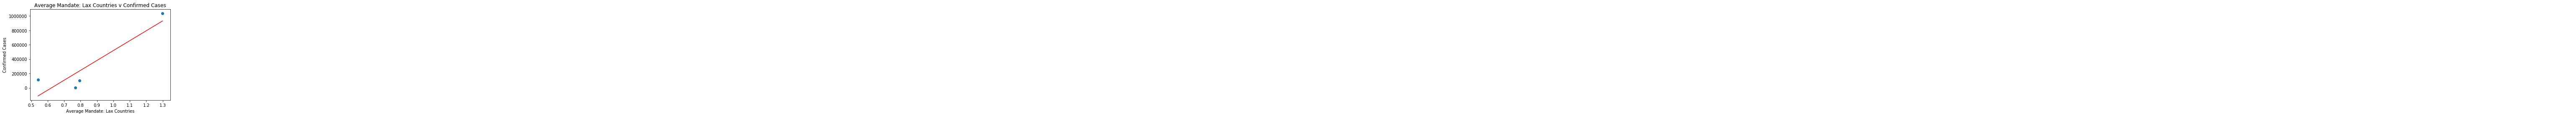

In [48]:
#linear regression relaxed mandates v relaxed cases
x_values = lax_df['Average Mandate']
y_values = lax_max['Confirmed Cases']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Lax Countries v Confirmed Cases')
plt.xlabel('Average Mandate: Lax Countries')
plt.ylabel('Confirmed Cases')
plt.show()

In [49]:
#pearsonr for relaxed mandates v relaxed cases
correlation = st.pearsonr(lax_df['Average Mandate'], lax_max['Confirmed Cases'])
correlation

(0.9100025559884284, 0.08999744401157161)

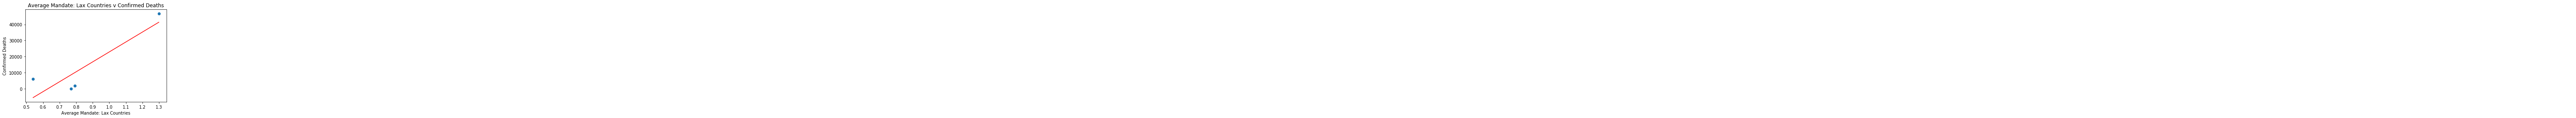

In [50]:
#linear regression relaxed mandates v relaxed deaths
x_values = lax_df['Average Mandate']
y_values = lax_d['Confirmed Deaths']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Lax Countries v Confirmed Deaths')
plt.xlabel('Average Mandate: Lax Countries')
plt.ylabel('Confirmed Deaths')
plt.show()

In [51]:
#pearsonr for relaxed mandates v relaxed deaths
correlation = st.pearsonr(lax_df['Average Mandate'], lax_d['Confirmed Deaths'])
correlation

(0.8920745759776135, 0.10792542402238647)

WHAT DID COUNTRIES SPENDING LOOK LIKE VS CONFIRMED COVID CASES AND DID IT HAVE ANY EFFECT? 

In [52]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')
data.set_index('CountryName')

,Date,C1_School_closing,C2_Workplace_closing,C6_Stay_home_requirements,E1_Income_support,E3_Fiscal_measures,H6_Facial_coverings,ConfirmedCases,ConfirmedDeaths
CountryName,,,,,,,,,
Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brazil,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
United States,2020-10-21,3.0,2.0,2.0,2.0,0.0,4.0,8273304.0,221066.0
United States,2020-10-22,3.0,2.0,2.0,2.0,0.0,4.0,8336282.0,222201.0
United States,2020-10-23,3.0,2.0,2.0,2.0,0.0,4.0,8408340.0,223042.0


In [53]:
#narrow down to just economic mandates and additional spending e3
df = data[['CountryName','E3_Fiscal_measures','ConfirmedCases','ConfirmedDeaths']]
df.head()

,CountryName,E3_Fiscal_measures,ConfirmedCases,ConfirmedDeaths
0,Brazil,0.0,0.0,0.0
1,Brazil,0.0,0.0,0.0
2,Brazil,0.0,0.0,0.0
3,Brazil,0.0,0.0,0.0
4,Brazil,0.0,0.0,0.0


In [54]:
df.set_index('CountryName')

,E3_Fiscal_measures,ConfirmedCases,ConfirmedDeaths
CountryName,,,
Brazil,0.0,0.0,0.0
Brazil,0.0,0.0,0.0
Brazil,0.0,0.0,0.0
Brazil,0.0,0.0,0.0
Brazil,0.0,0.0,0.0
...,...,...,...
United States,0.0,8273304.0,221066.0
United States,0.0,8336282.0,222201.0
United States,0.0,8408340.0,223042.0


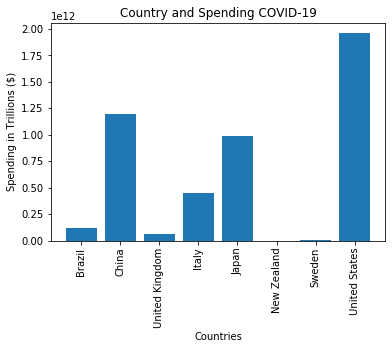

In [55]:
plt.bar(df['CountryName'],df['E3_Fiscal_measures'])
plt.xticks(rotation='vertical')
plt.title('Country and Spending COVID-19')
plt.xlabel('Countries')
plt.ylabel('Spending in Trillions ($)')
plt.show()

In [56]:
us_sum = us['E3_Fiscal_measures'].sum()
china_sum = china['E3_Fiscal_measures'].sum()
uk_sum = uk['E3_Fiscal_measures'].sum()
italy_sum = italy['E3_Fiscal_measures'].sum()
sweden_sum = meatball['E3_Fiscal_measures'].sum()
japan_sum = japan['E3_Fiscal_measures'].sum()
nz_sum = nz['E3_Fiscal_measures'].sum()
brazil_sum = brazil['E3_Fiscal_measures'].sum()

total = {'Country':['China','Brazil','United States','Italy','United Kingdom'
                    ,'Japan','New Zealand','Sweden'],
          'Total Spending':[china_sum, brazil_sum, us_sum, italy_sum,
                            uk_sum,japan_sum, nz_sum, sweden_sum]}

sum_df = pd.DataFrame(data = total)
#sum_df.style.format('${:,.2f}')
money = pd.merge(sum_df, totals_df, how='outer')
money

,Country,Total Spending,Confirmed Cases
0,China,2.136809e+12,91241.0
1,Brazil,1.858207e+11,5439641.0
2,United States,2.535200e+12,8576725.0
3,Italy,5.420222e+11,449648.0
4,United Kingdom,1.812783e+11,1034914.0
5,Japan,1.005522e+12,101813.0
6,New Zealand,0.000000e+00,1603.0
7,Sweden,8.162169e+09,115927.0


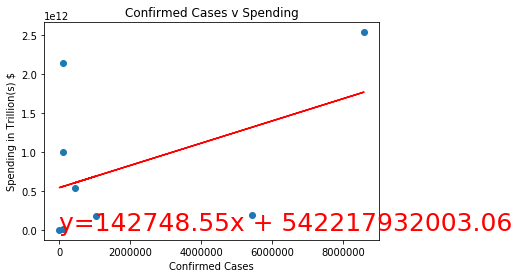

(0.46398519375677144, 0.24682346289246607)

In [57]:
x_values = money['Confirmed Cases']
y_values = money['Total Spending']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Confirmed Cases v Spending')
plt.xlabel('Confirmed Cases')
plt.ylabel('Spending in Trillion(s) $')
plt.show()

correlation = st.pearsonr(money['Confirmed Cases'],money['Total Spending'] )
correlation

Little relationship between countries spending and total cases. Through the Pearson r correlation we can see that there is almost no relationship between spending and case amounts.